In [1]:
from nufeb_tools import utils,plot,spatial
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from pathlib import Path
import cv2
import matplotlib as mpl
from joblib import Parallel, delayed, dump,load

In [2]:
DIR = Path(r'E:\fitness-cost')
folders = [path for path in DIR.glob('runs_*_*/*') if path.is_dir()]

def collect_data(folder):
    x = utils.get_data(directory=str(folder))
    temp = x.biomass.reset_index()[['Hours','cyano','ecw']]
    temp.loc[:,'Fitness cost'] = float(str(folder).split('_')[1])
    temp.loc[:,'Biomass flux'] = float(str(folder).split('_')[2].split('\\')[0])
    temp.loc[:,'Sucrose']=x.avg_con['Sucrose'].reset_index()['Sucrose']
    temp.loc[:,'pop_ratio'] = temp.ecw/temp.cyano
    return temp
if Path(r'E:\fitness-cost.pkl').is_file():
    data= pd.read_pickle(r'E:\fitness-cost.pkl')
else:
    with Parallel(n_jobs=-1) as parallel:
        temp = parallel(delayed(collect_data)(folder) for folder in sorted(folders))
    data = pd.concat(temp,ignore_index=True)
    data.to_pickle(r'E:\fitness-cost.pkl')


In [3]:
data['Biomass flux'].unique()

array([0.5, 1. , 2. , 3. , 4. , 5. ])

In [9]:
data

,Hours,cyano,ecw,Fitness cost,Biomass flux,Sucrose,pop_ratio
0,0.000000,9920.864,10712.12,0.1,0.5,9.991236e-20,1.079757
1,0.277778,9939.463,10702.98,0.1,0.5,3.294131e-04,1.076817
2,0.555556,9958.097,10693.87,0.1,0.5,6.479299e-04,1.073887
3,0.833333,9976.766,10684.78,0.1,0.5,9.656906e-04,1.070966
4,1.111111,9995.470,10675.73,0.1,0.5,1.282726e-03,1.068057
...,...,...,...,...,...,...,...
60881,60.000000,4382682.000,9723757.00,1.0,5.0,5.803272e+00,2.218677
60882,60.277778,4454127.000,9893206.00,1.0,5.0,5.793526e+00,2.221132
60883,60.555556,4524461.000,10061630.00,1.0,5.0,5.781280e+00,2.223830
60884,60.833333,4602779.000,10237040.00,1.0,5.0,5.787035e+00,2.224100


In [15]:
df =data.loc[data.Hours==data.Hours.iloc[-1]].groupby(['Fitness cost','Biomass flux']).mean().reset_index()
df['total']= df.ecw+df.cyano

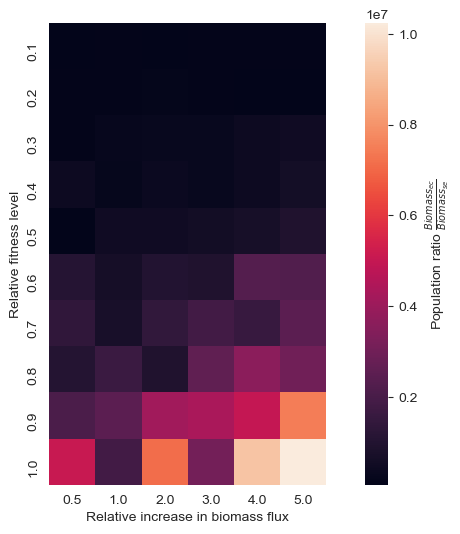

In [16]:
f, ax = plt.subplots(figsize=(10,6))
piv = df.pivot_table(index='Fitness cost', columns='Biomass flux', values='total')
g = sns.heatmap(piv, square=True,ax=ax)#cmap='coolwarm',
cbar = g.collections[0].colorbar
cbar.ax.set_ylabel(r'Population ratio $\frac{Biomass_{ec}}{Biomass_{se}}$')
ax.set_ylabel('Relative fitness level')
ax.set_xlabel('Relative increase in biomass flux')
plt.show()


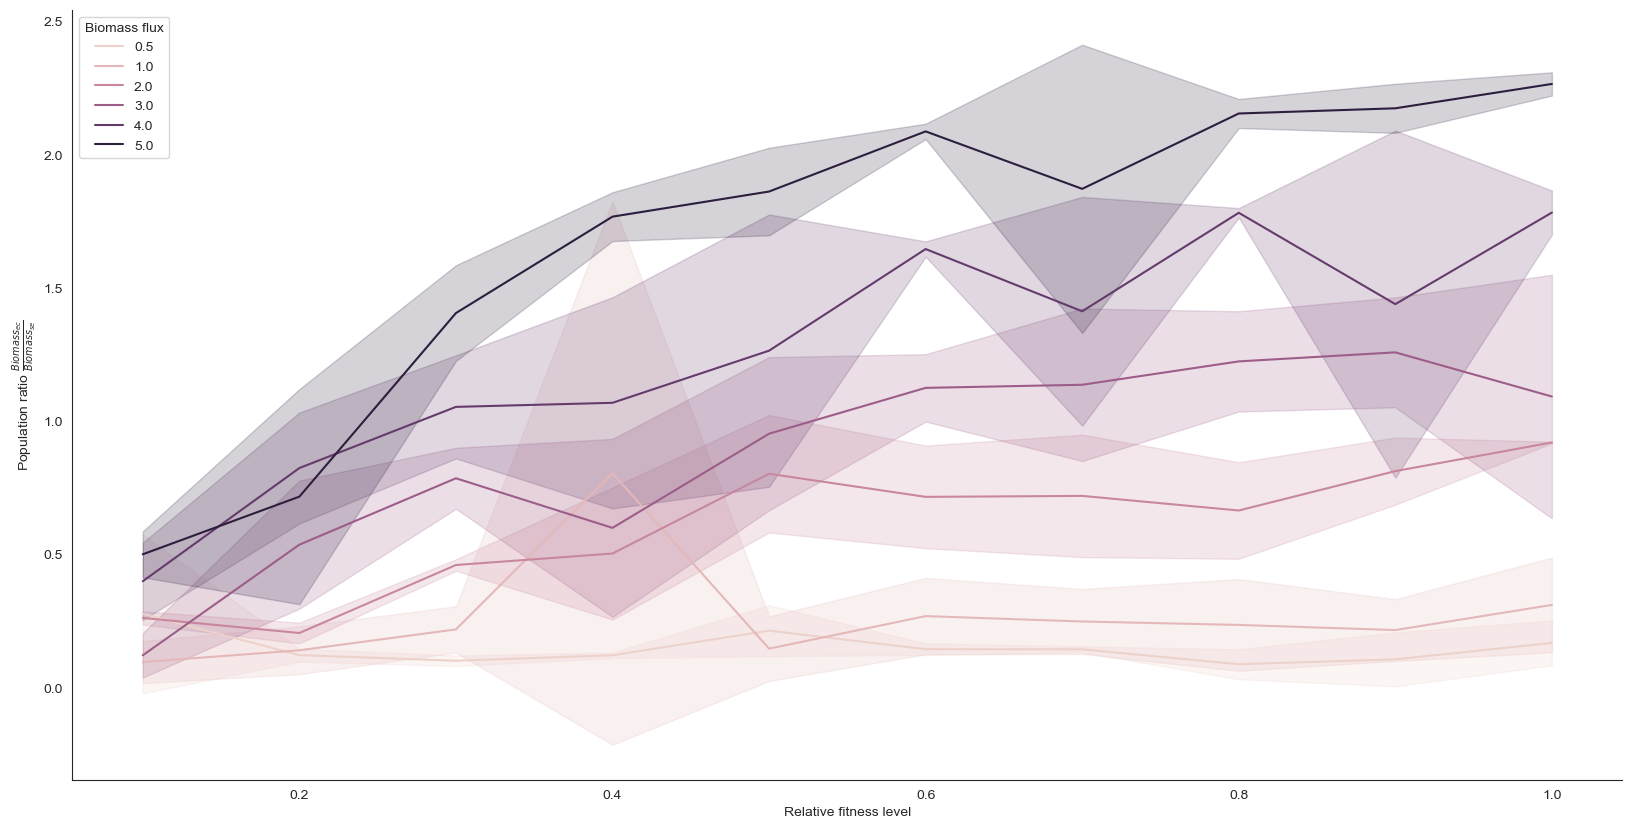

In [8]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='Fitness cost',y='pop_ratio',hue='Biomass flux',estimator='mean',ci='sd',data=data.loc[data.Hours==data.Hours.iloc[-1]],ax=ax)
ax.set_xlabel('Relative fitness level')
ax.set_ylabel(r'Population ratio $\frac{Biomass_{ec}}{Biomass_{se}}$')
sns.despine()
plt.show()


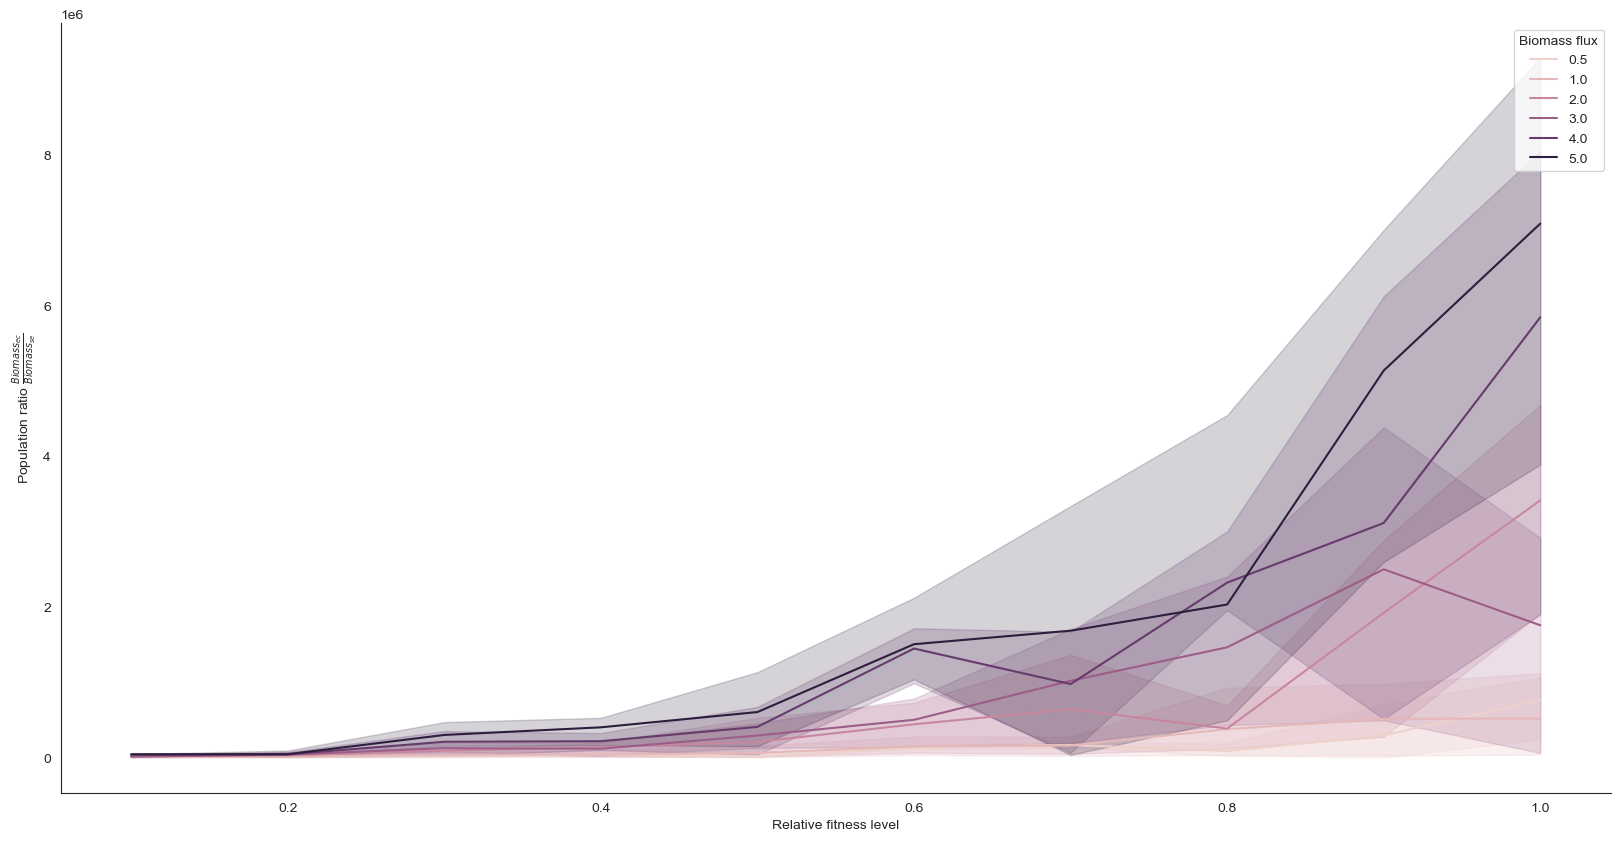

In [13]:
sns.set_style('white')
f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x='Fitness cost',y='ecw',hue='Biomass flux',data=data.loc[data.Hours==data.Hours.iloc[-1]],ax=ax)
ax.set_xlabel('Relative fitness level')
ax.set_ylabel(r'Population ratio $\frac{Biomass_{ec}}{Biomass_{se}}$')
sns.despine()
plt.show()
